# IBM Applied Data Science Capstone Course by Coursera
### RAKESH KUMAR SAHOO
**_Opening a New Shopping Mall in Singapore._**
- Build a dataframe of neighborhoods in Singapore by web scraping the data from Wikipedia page
- Get the geographical coordinates of the neighborhoods
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods
- Select the best cluster to open a new shopping mall

### 1. Import libraries

In [1]:
#!pip install geocoder
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### 2. Scrap data from Wikipedia page into a DataFrame

In [2]:
data = requests.get("https://en.wikipedia.org/wiki/Category:Shopping_malls_in_Singapore").text

In [3]:
# Parse data from the html into a Beautifulsoup Object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# Creating a New List Object.
neighborhoodList = []

In [5]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [6]:
# create a new DataFrame from the list
sg_df = pd.DataFrame({"Neighborhood": neighborhoodList})
sg_df = sg_df[1:]
sg_df.head()

,Neighborhood
1,112 Katong
2,600 @ Toa Payoh
3,AMK Hub
4,Beauty World Market
5,Bedok Mall


In [7]:
# print the number of rows of the dataframe
sg_df.shape

(104, 1)

### 3. Get the geographical coordinates

In [8]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Singapore'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [9]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in sg_df["Neighborhood"].tolist() ]
coords

[[1.3052339999999987, 103.90490549999998],
 [1.3341500000000224, 103.85133000000008],
 [1.3690400227939952, 103.84861996667455],
 [1.3423100000000545, 103.77584000000007],
 [1.324180037797634, 103.9299599427268],
 [1.3250500621789816, 103.93250992281747],
 [1.3001899877377339, 103.85571000000004],
 [1.3008100000000695, 103.85591000000005],
 [1.4451821735119241, 103.82598380419607],
 [1.2927800783364802, 103.85148998831467],
 [1.2986800000000471, 103.85367000000008],
 [1.2927800744413083, 103.85148999942317],
 [1.2988600000000474, 103.84742000000006],
 [1.3012800000000198, 103.83684000000005],
 [1.435640001153906, 103.78630993724421],
 [1.301230069969268, 103.83923007386446],
 [1.3527999660976093, 103.94397996667458],
 [1.2836900000000355, 103.85261000000008],
 [1.3338100000000281, 103.96349000000004],
 [1.285399973887933, 103.84485997446484],
 [1.3106700089441743, 103.85645007328749],
 [1.2922100255352666, 103.85578994892961],
 [1.3149600000000419, 103.76509000000004],
 [1.391930054965

In [10]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [11]:
# merge the coordinates into the original dataframe
sg_df['Latitude'] = df_coords['Latitude']
sg_df['Longitude'] = df_coords['Longitude']

In [12]:
# check the neighborhoods and the coordinates, Dropping the NaN values.
print(sg_df.shape)
sg_df = sg_df.dropna()
sg_df

(104, 3)


,Neighborhood,Latitude,Longitude
1,112 Katong,1.334150,103.851330
2,600 @ Toa Payoh,1.369040,103.848620
3,AMK Hub,1.342310,103.775840
4,Beauty World Market,1.324180,103.929960
5,Bedok Mall,1.325050,103.932510
6,Bedok Point,1.300190,103.855710
7,Bugis Junction,1.300810,103.855910
8,Bugis+,1.445182,103.825984
9,Canberra Plaza,1.292780,103.851490
10,"Capitol Building, Singapore",1.298680,103.853670


In [13]:
# save the DataFrame as CSV file
sg_df.to_csv("sg_df.csv", index=False)

### Getting the Latitude and longitude values using geopy library.

In [19]:
# get the coordinates of Singapore.
address = 'Singapore'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address,timeout=10)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore 1.357107, 103.8194992.


### 4. Create a map of Singapore with neighborhoods superimposed on top

In [20]:
# create map of Singapore using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(sg_df['Latitude'], sg_df['Longitude'], sg_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_sg)  
    
map_sg

In [21]:
# save the map as HTML file
map_sg.save('map_sg.html')

#### Define Foursquare Credentials and Version

In [53]:
# define Foursquare Credentials and Version
CLIENT_ID = '***********************************************' # your Foursquare ID
CLIENT_SECRET = '***********************************************' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ***********************************************
CLIENT_SECRET:***********************************************


#### Let's explore the first neighborhood in our dataframe.

In [23]:
sg_df.get_value(0,0, takeable = True)

C:\RAKESH\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


'112 Katong'

In [24]:
neighbourhood_latitude = sg_df.get_value(0,1, takeable = True) # neighbourhood latitude value
neighbourhood_longitude = sg_df.get_value(0,2, takeable = True) # neighbourhood longitude value

neighbourhood_name = sg_df.get_value(0,0, takeable = True) # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of 112 Katong are 1.3341500000000224, 103.85133000000008.


C:\RAKESH\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\RAKESH\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\RAKESH\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [25]:
LIMIT = 100
radius = 2000

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=OZ4ONIXHU04N5CHRR53EBY40PPKXKRLNVT10KLSYXVSE4QID&client_secret=L32N3FYWO3OPOELU00N4DH5VONZDOYW115IJDUGGTH3GRJVN&v=20180605&ll=1.3341500000000224,103.85133000000008&radius=2000&limit=100'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e252f33c94979001b7f5a64'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toa Payoh',
  'headerFullLocation': 'Toa Payoh, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 212,
  'suggestedBounds': {'ne': {'lat': 1.3521500180000403,
    'lng': 103.86930128175213},
   'sw': {'lat': 1.3161499820000044, 'lng': 103.83335871824802}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d143ccc816af04dce8d3ac2',
       'name': 'Hougang 6 Miles Famous Muah Chee',
       'location': {'address': 'Stall 21, Gourmet Paradise (@ HDB Hub)',
        'crossStreet': '480 Lorong 6 Toa Payoh',
        'lat': 1.3322404428254564,
        'l

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Hougang 6 Miles Famous Muah Chee,Snack Place,1.332240,103.847977
1,Tandoori Corner,Indian Restaurant,1.325778,103.850011
2,Ramada,Hotel,1.327287,103.846653
3,Kidz Amaze,Playground,1.330053,103.854750
4,Swimming Pool @ SAFRA TPY,Pool,1.330297,103.854211


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [30]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(sg_df['Latitude'], sg_df['Longitude'], sg_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [31]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(10002, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,112 Katong,1.33415,103.85133,Hougang 6 Miles Famous Muah Chee,1.332240,103.847977,Snack Place
1,112 Katong,1.33415,103.85133,Tandoori Corner,1.325778,103.850011,Indian Restaurant
2,112 Katong,1.33415,103.85133,Ramada,1.327287,103.846653,Hotel
3,112 Katong,1.33415,103.85133,Kidz Amaze,1.330053,103.854750,Playground
4,112 Katong,1.33415,103.85133,Swimming Pool @ SAFRA TPY,1.330297,103.854211,Pool


#### Let's check how many venues were returned for each neighorhood

In [32]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
112 Katong,100,100,100,100,100,100
600 @ Toa Payoh,100,100,100,100,100,100
AMK Hub,84,84,84,84,84,84
Beauty World Market,100,100,100,100,100,100
Bedok Mall,100,100,100,100,100,100
Bedok Point,100,100,100,100,100,100
Bugis Junction,100,100,100,100,100,100
Bugis+,86,86,86,86,86,86
Canberra Plaza,100,100,100,100,100,100


In [33]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 298 uniques categories.


In [34]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Snack Place', 'Indian Restaurant', 'Hotel', 'Playground', 'Pool',
       'Chinese Restaurant', 'Dessert Shop', 'Supermarket', 'Park',
       'Seafood Restaurant', 'Trail', 'Food Court', 'Hakka Restaurant',
       'Kids Store', 'BBQ Joint', 'Tea Room', 'Frozen Yogurt Shop',
       'Cosmetics Shop', 'Monument / Landmark', 'Coffee Shop', 'Food',
       'Asian Restaurant', 'Convenience Store', 'Market', 'Bakery',
       'Flower Shop', 'Vietnamese Restaurant', 'Gym',
       'Japanese Restaurant', 'Sandwich Place', 'Ice Cream Shop',
       'Soccer Stadium', 'Bagel Shop', 'Non-Profit',
       'Sporting Goods Shop', 'Ramen Restaurant', 'Café',
       'Residential Building (Apartment / Condo)', 'Soup Place',
       'Hotpot Restaurant', 'Shaanxi Restaurant',
       'Fruit & Vegetable Store', 'Noodle House', 'Restaurant', 'Stables',
       'Bar', 'Middle Eastern Restaurant', 'Thai Restaurant', 'Spa',
       'Burger Joint'], dtype=object)

In [35]:
# check if the results contain "Shopping Mall"
"Neighborhood" in venues_df['VenueCategory'].unique()

True

In [36]:
# one hot encoding
sg_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

print(sg_onehot.shape)
sg_onehot.head()

(10002, 299)


,Neighborhoods,Accessories Store,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Aristocrat Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Stadium,College Theater,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Light Rail Station,Lingerie Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Nail Salon,Nature Preserve,Neighborhood,Night Market,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outlet Store,Paella Restaurant,Pakistani Restaurant,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Pub,Racetrack,Ramen Restaurant,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,TV Station,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attra

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [37]:
sg_grouped = sg_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(sg_grouped.shape)
sg_grouped

(102, 299)


,Neighborhoods,Accessories Store,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Aristocrat Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Stadium,College Theater,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Light Rail Station,Lingerie Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Nail Salon,Nature Preserve,Neighborhood,Night Market,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outlet Store,Paella Restaurant,Pakistani Restaurant,Park,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Pub,Racetrack,Ramen Restaurant,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,TV Station,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attra

In [38]:
len(sg_grouped[sg_grouped["Shopping Mall"] > 0])

89

#### Create a new DataFrame for Shopping Mall data only

In [39]:
sg_mall = sg_grouped[["Neighborhoods","Shopping Mall"]]

In [40]:
sg_mall.head()

,Neighborhoods,Shopping Mall
0,112 Katong,0.0
1,600 @ Toa Payoh,0.0
2,AMK Hub,0.0
3,Beauty World Market,0.0
4,Bedok Mall,0.0


### 7. Cluster Neighborhoods

In [41]:
# set number of clusters
sg_clusters = 3

sg_clustering = sg_mall.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=sg_clusters, random_state=0).fit(sg_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 0, 0, 2, 0, 0])

In [42]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
sg_merged = sg_mall.copy()

# add clustering labels
sg_merged["Cluster Labels"] = kmeans.labels_

In [43]:
sg_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
sg_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels
0,112 Katong,0.0,2
1,600 @ Toa Payoh,0.0,2
2,AMK Hub,0.0,2
3,Beauty World Market,0.0,2
4,Bedok Mall,0.0,2


In [44]:
sg_merged = sg_merged.join(sg_df.set_index("Neighborhood"), on="Neighborhood")

print(sg_merged.shape)
sg_merged.head() # check the last columns!

(102, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,112 Katong,0.0,2,1.33415,103.85133
1,600 @ Toa Payoh,0.0,2,1.36904,103.84862
2,AMK Hub,0.0,2,1.34231,103.77584
3,Beauty World Market,0.0,2,1.32418,103.92996
4,Bedok Mall,0.0,2,1.32505,103.93251


In [45]:
# sort the results by Cluster Labels
print(sg_merged.shape)
sg_merged.sort_values(["Cluster Labels"], inplace=True)
sg_merged

(102, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
101,Wisma Atria,0.030000,0,1.290410,103.852110
81,Tampines 1,0.020000,0,1.353190,103.944790
80,Suntec City,0.020000,0,1.354520,103.945290
79,"Sun Plaza, Singapore",0.030000,0,1.290410,103.852110
34,Heartland Mall,0.020000,0,1.372470,103.894140
35,Hougang Mall,0.020000,0,1.334650,103.745900
78,"Stamford House, Singapore",0.018868,0,1.448120,103.819040
37,ION Orchard,0.020000,0,1.332980,103.740440
77,Specialists' Shopping Centre,0.020000,0,1.293813,103.851202
39,JCube,0.022222,0,1.332470,103.743420


#### Finally, let's visualize the resulting clusters

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(sg_clusters)
ys = [i+x+(i*x)**2 for i in range(sg_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Neighborhood'], sg_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

#### 8. Examine Clusters

#### Cluster 0.

In [48]:
print(sg_merged.loc[sg_merged['Cluster Labels'] == 0].shape)
sg_merged.loc[sg_merged['Cluster Labels'] == 0]

(55, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
101,Wisma Atria,0.030000,0,1.290410,103.852110
81,Tampines 1,0.020000,0,1.353190,103.944790
80,Suntec City,0.020000,0,1.354520,103.945290
79,"Sun Plaza, Singapore",0.030000,0,1.290410,103.852110
34,Heartland Mall,0.020000,0,1.372470,103.894140
35,Hougang Mall,0.020000,0,1.334650,103.745900
78,"Stamford House, Singapore",0.018868,0,1.448120,103.819040
37,ION Orchard,0.020000,0,1.332980,103.740440
77,Specialists' Shopping Centre,0.020000,0,1.293813,103.851202
39,JCube,0.022222,0,1.332470,103.743420


#### Clustre 1.

In [49]:
print(sg_merged.loc[sg_merged['Cluster Labels'] == 1].shape)
sg_merged.loc[sg_merged['Cluster Labels'] == 1]

(12, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
92,Tiong Bahru Plaza,0.05,1,1.300620,103.837460
67,People's Park Complex,0.05,1,1.300400,103.845190
85,The Cathay,0.06,1,1.301280,103.836840
64,Palais Renaissance,0.05,1,1.304037,103.835988
60,Orchard Central,0.04,1,1.300340,103.839340
50,Lot One,0.06,1,1.304050,103.833850
31,Golden Mile Complex,0.05,1,1.292660,103.832620
38,International Plaza (Singapore),0.04,1,1.303600,103.831950
59,One Raffles Place,0.04,1,1.301200,103.839210
100,"White Sands Shopping Mall, Singapore",0.04,1,1.303720,103.832810


#### Cluster 2.

In [50]:
print(sg_merged.loc[sg_merged['Cluster Labels'] == 2].shape)
sg_merged.loc[sg_merged['Cluster Labels'] == 2]

(35, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
3,Beauty World Market,0.000000,2,1.324180,103.929960
84,Tekka Centre,0.000000,2,1.354910,103.831260
19,CityLink Mall,0.010000,2,1.314960,103.765090
17,Chinatown Point,0.010000,2,1.310670,103.856450
16,Changi City Point,0.010000,2,1.285400,103.844860
88,"The Majestic, Singapore",0.010000,2,1.283250,103.859710
2,AMK Hub,0.000000,2,1.342310,103.775840
89,"The Paragon, Singapore",0.010309,2,1.302110,103.904740
91,Thomson Plaza,0.010000,2,1.286580,103.827810
99,Wheelock Place,0.010526,2,1.372760,103.949670


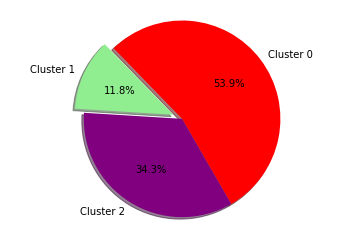

In [52]:
import matplotlib.pyplot as plt

# Data to plot
labels = "Cluster 0", "Cluster 1", "Cluster 2"
size0= len(sg_merged.loc[sg_merged['Cluster Labels'] == 0])
size1= len(sg_merged.loc[sg_merged['Cluster Labels'] == 1])
size2=len(sg_merged.loc[sg_merged['Cluster Labels'] == 2])

sizes = [size0,size1,size2]
#print(sizes)
colors = ['red', 'lightgreen', 'purple']
explode = (0, 0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=300)
plt.axis('equal')
plt.show()

#### Observations:
Most of the shopping malls are concentrated in the central area of Singapore city, with the highest number in cluster 0 and moderate number in cluster 2. On the other hand, cluster 1 has very low number to totally no shopping mall in the neighborhoods. This represents a great opportunity and high potential areas to open new shopping malls as there is very little to no competition from existing malls. Meanwhile, shopping malls in cluster 0 are likely suffering from intense competition due to oversupply and high concentration of shopping malls. From another perspective, this also shows that the oversupply of shopping malls mostly happened in the central area of the city, with the suburb area still have very few shopping malls. Therefore, this project recommends property developers to capitalize on these findings to open new shopping malls in neighborhoods in cluster 1 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new shopping malls in neighborhoods in cluster 2 with moderate competition. Lastly, property developers are advised to avoid neighborhoods in cluster 0 which already have high concentration of shopping malls and suffering from intense competition.